## Training SVM classifier on DD_ACC dataset

The first step is to read dataset from CSV file

In [1]:
import pandas as pd
from sklearn import preprocessing


#dd_dataset = pd.read_csv('./dataset/dd_pssm_dataset_improved.csv')
# Add separated dimers feature extraction

dd_dataset = pd.read_csv('../dataset/TG/tg_fusion_acc_dimer_FULL.csv')

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected

In [2]:
dd_dataset.head()

,Fold,Protein name,F1,F2,F3,F4,F5,F6,F7,F8,...,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000
0,CytochromeC(a.3),d1c52__131,-0.860051,-0.020321,0.408413,1.245372,-1.653580e-01,-0.756627,-0.061376,-0.392492,...,2668.470125,2568.958421,2461.125266,2210.113682,2391.294699,2540.620041,2524.454867,2325.668887,2686.316308,2569.831850
1,CytochromeC(a.3),d1c75a_73,-1.193668,-0.062892,0.034965,2.050066,-3.771122e-03,1.942937,-0.116217,2.007126,...,1337.705924,1176.294925,1301.443665,1204.564696,1410.252456,1142.397918,1270.069229,1123.534634,1383.534603,1393.169579
2,CytochromeC(a.3),d1cc5__83,-0.232951,-0.173773,1.449987,0.351181,7.792407e-31,-0.391041,-0.093766,0.312530,...,1274.038897,1239.936930,1237.949113,1239.497593,1283.197455,1174.359542,1164.211170,1240.616939,1310.128682,1321.025118
3,CytochromeC(a.3),d1cnoa_86,0.115326,-0.010802,-0.024305,-0.010802,0.000000e+00,0.031977,-0.002701,-0.043209,...,52.646098,39.469147,39.469147,56.092459,52.646098,43.861464,52.646098,39.469147,57.038415,35.076830
4,CytochromeC(a.3),d1ctj__91,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Convert class lables to unique integers

In [3]:
# Encode class labels
#from sklearn.preprocessing import LabelEncoder

y_true, labels = pd.factorize(dd_dataset.Fold)
dd_dataset.insert(1, 'class labels', y_true)

In [4]:
dd_dataset.head()

,Fold,class labels,Protein name,F1,F2,F3,F4,F5,F6,F7,...,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000
0,CytochromeC(a.3),0,d1c52__131,-0.860051,-0.020321,0.408413,1.245372,-1.653580e-01,-0.756627,-0.061376,...,2668.470125,2568.958421,2461.125266,2210.113682,2391.294699,2540.620041,2524.454867,2325.668887,2686.316308,2569.831850
1,CytochromeC(a.3),0,d1c75a_73,-1.193668,-0.062892,0.034965,2.050066,-3.771122e-03,1.942937,-0.116217,...,1337.705924,1176.294925,1301.443665,1204.564696,1410.252456,1142.397918,1270.069229,1123.534634,1383.534603,1393.169579
2,CytochromeC(a.3),0,d1cc5__83,-0.232951,-0.173773,1.449987,0.351181,7.792407e-31,-0.391041,-0.093766,...,1274.038897,1239.936930,1237.949113,1239.497593,1283.197455,1174.359542,1164.211170,1240.616939,1310.128682,1321.025118
3,CytochromeC(a.3),0,d1cnoa_86,0.115326,-0.010802,-0.024305,-0.010802,0.000000e+00,0.031977,-0.002701,...,52.646098,39.469147,39.469147,56.092459,52.646098,43.861464,52.646098,39.469147,57.038415,35.076830
4,CytochromeC(a.3),0,d1ctj__91,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Create a training set from pandas data frame

In [5]:
train_data = dd_dataset.iloc[:,3:].values

# Normalize dataset
min_max_scaler = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler.fit_transform(train_data)
train_data = train_scaled

print("Number of samples: %d, Number of features: %d" % (train_data.shape[0], train_data.shape[1]))

Number of samples: 1612, Number of features: 2000


In [6]:
# Show normlaized data

train = pd.DataFrame(train_data)

train.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.303131,0.758310,0.364892,0.662607,0.377592,0.356865,0.409897,0.340548,0.724592,0.294068,...,0.171462,0.170400,0.161728,0.144031,0.155685,0.171406,0.168301,0.163712,0.163750,0.162056
1,0.236358,0.752495,0.311875,0.804764,0.426185,0.784764,0.386362,0.873023,0.659864,0.293044,...,0.085954,0.078024,0.085522,0.078501,0.091814,0.077073,0.084673,0.079090,0.084336,0.087855
2,0.428644,0.737350,0.512759,0.504639,0.427319,0.414813,0.395997,0.496992,0.469270,0.468298,...,0.081863,0.082245,0.081349,0.080777,0.083542,0.079229,0.077616,0.087331,0.079862,0.083305
3,0.498351,0.759610,0.303461,0.440691,0.427319,0.481864,0.435078,0.418054,0.492551,0.343362,...,0.003383,0.002618,0.002594,0.003656,0.003428,0.002959,0.003510,0.002778,0.003477,0.002212
4,0.475269,0.761086,0.306911,0.442599,0.427319,0.476795,0.436237,0.427642,0.503635,0.352519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Data analysis

In [7]:
# Frequency of folds
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
freq_plot = dd_dataset['Fold'].value_counts().plot(ax=ax, kind='bar')
freq_plot.set_ylabel('Number of proteins')
plt.show()

<Figure size 640x480 with 1 Axes>

## SVM classifier

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Hyperparameters
kernel = 'rbf'

# An instance of SVM classifier
svm_cl = SVC(kernel=kernel)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Define range of parameters for Grid Search

In [9]:
# Penalty parameter
c_range = {'C': [float(2**i) for i in range(-14, 14)]}
# Gamma parameter for RBF kernel
gamma_range = {'gamma': [float(2**i) for i in range(-14, 14)]} if kernel == 'rbf' else {}

param_range = {**c_range, **gamma_range}

# Arguments for grid search
cv_fold = 10
n_workers = -1 # Number of CPU threads

result = GridSearchCV(svm_cl, param_range, cv=cv_fold, n_jobs=n_workers, refit=True,
                      verbose=1)

Start grid search!

In [10]:
result.fit(train_data, y_true)

Fitting 10 folds for each of 784 candidates, totalling 7840 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 76.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 102.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 132.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 167.0min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 204.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 245.6min
[Parallel(n_jobs=-1)]: Done 7840 out of 7840 | elapsed: 268.9min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'gamma': [6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0], 'C': [6.103515625e-05, 0.0...25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [11]:
print("Best accuracy: %.2f" % (result.best_score_ * 100))

Best accuracy: 24.50


Confusion matrix

Accuracy:  70.5955334987593


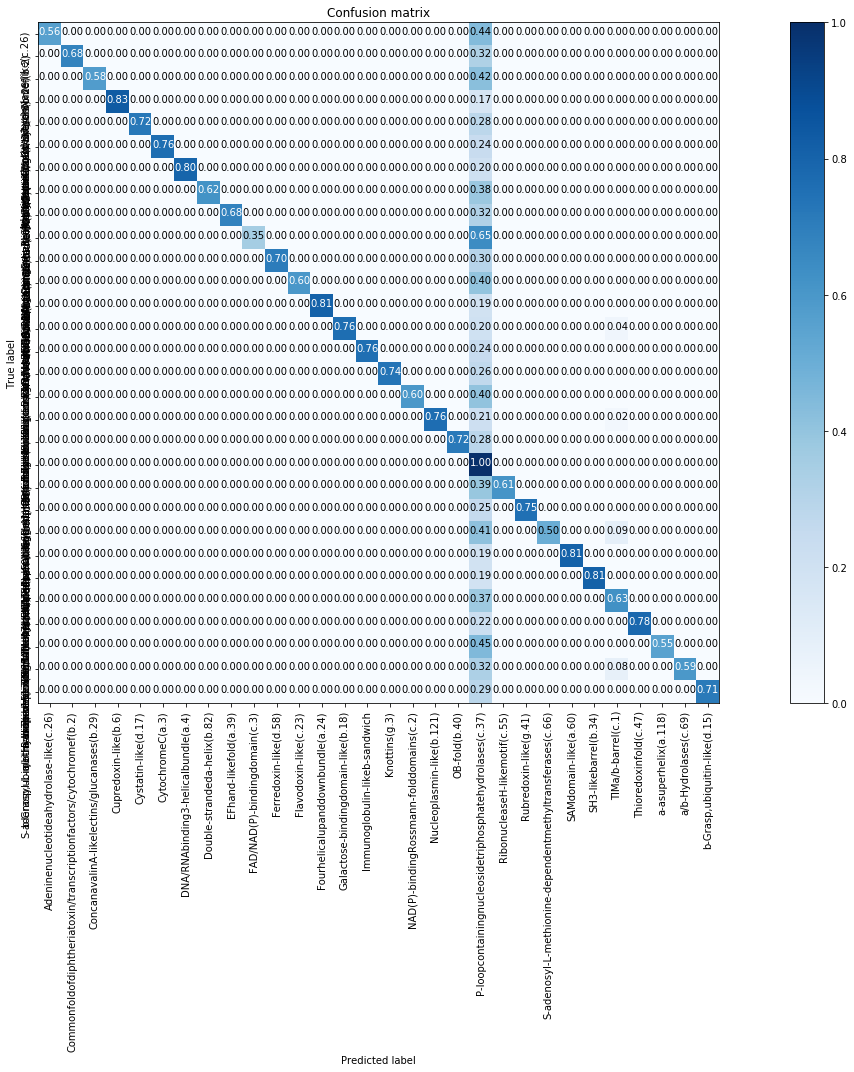

In [14]:
import sys
sys.path.insert(0, '../')


from misc import plt_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

y_pred = result.best_estimator_.predict(train_data)

cm = confusion_matrix(labels[y_true], labels[y_pred])

print("Accuracy: ", (accuracy_score(labels[y_true], labels[y_pred]) * 100))

plt.figure(figsize=(20, 15))
plt_confusion_matrix(cm, np.unique(labels[y_true]))
plt.savefig("../report/DD_IG_ACC_confusion_matrix.png", dpi=256)

Classification report

In [15]:
print(classification_report(labels[y_true], labels[y_pred]))

                                                                   precision    recall  f1-score   support

                           Adeninenucleotideahydrolase-like(c.26)       1.00      0.56      0.72        34
Commonfoldofdiphtheriatoxin/transcriptionfactors/cytochromef(b.2)       1.00      0.68      0.81        28
                       ConcanavalinA-likelectins/glucanases(b.29)       1.00      0.58      0.73        26
                                             Cupredoxin-like(b.6)       1.00      0.83      0.91        30
                                              Cystatin-like(d.17)       1.00      0.72      0.84        25
                                                 CytochromeC(a.3)       1.00      0.76      0.86        25
                               DNA/RNAbinding3-helicalbundle(a.4)       1.00      0.80      0.89       103
                                     Double-strandeda-helix(b.82)       1.00      0.62      0.76        34
                                    

# XG Boost

In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create Dmatrix for more performance 
data_matrix = xgb.DMatrix(data=float(train_data),label=float(labels)

# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(float(train_data), float(labels), test_size=0.2, random_state=123)

SyntaxError: invalid syntax (<ipython-input-14-a31eead7f1eb>, line 10)

In [ ]:
# Instantitate an XGBosst Classifier
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.1, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 10)


In [ ]:
# Fit the classifier to the training set
xg_clf.fit(X_train,y_train)

# Predit test data
preds = xg_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, preds)

In [ ]:
print("Best accuracy: %.2f" % (accuracy*100))
